<a href="https://colab.research.google.com/github/Titankhoa/ThucHanhXuLyAnhSo/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Viet chuong trinh bien doi anh


1.1 Chọn đối tượng trong ảnh

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving fruit.jpg to fruit.jpg


(1427, 2100, 3)


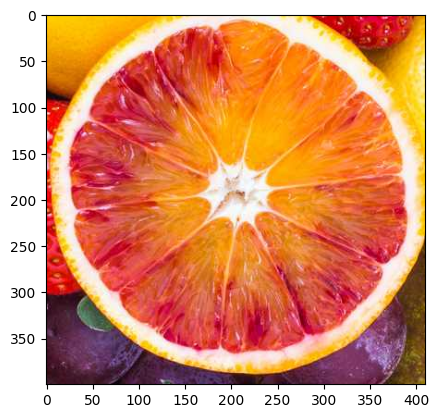

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')  # đảm bảo đã upload file này
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()


1.2 Tịnh tiến đơn


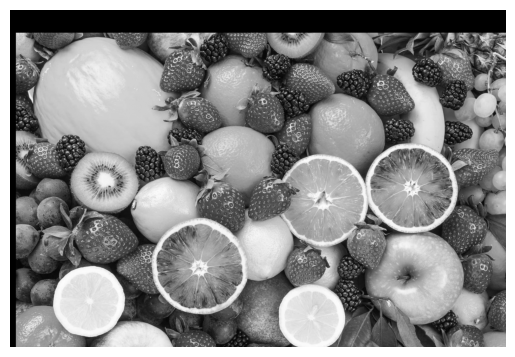

In [ ]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import imageio.v2 as iio

# Đọc ảnh màu rồi chuyển sang ảnh xám (nếu cần thiết)
data = iio.imread('fruit.jpg')
if data.ndim == 3:  # ảnh màu RGB
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])  # chuyển sang ảnh xám

bdata = nd.shift(data, (100, 25))

plt.imshow(bdata, cmap='gray')
plt.axis('off')
plt.show()


1.3 Thay đổi kích thước ảnh


(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


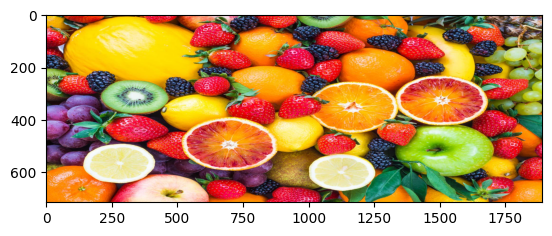

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom (data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

1.4 Xoay ảnh


(1427, 2100, 3)


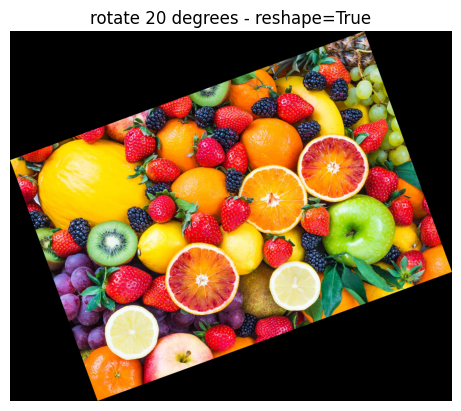

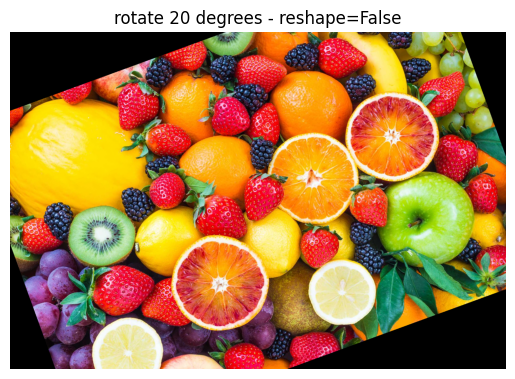

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20, reshape=True)
plt.imshow(d1)
plt.title("rotate 20 degrees - reshape=True")
plt.axis('off')
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.title("rotate 20 degrees - reshape=False")
plt.axis('off')
plt.show()


1.5 Dilation và Erosion


(309, 515)


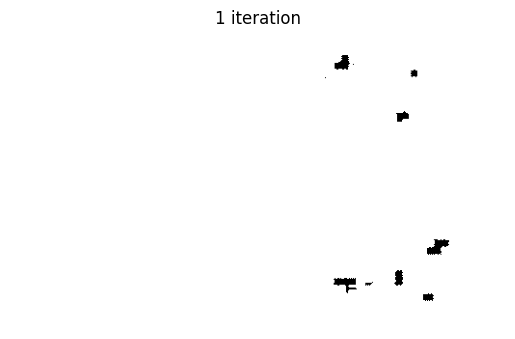

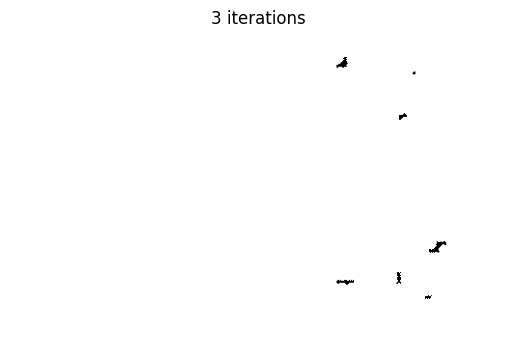

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh và chuyển sang ảnh xám thủ công nếu là ảnh màu
data = iio.imread('world_cup.jpg')
if data.ndim == 3:  # ảnh màu RGB
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])

print(data.shape)

# Áp dụng phép co giãn nhị phân (binary dilation)
d1 = nd.binary_dilation(data)
plt.imshow(d1, cmap='gray')
plt.title("1 iteration")
plt.axis('off')
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2, cmap='gray')
plt.title("3 iterations")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving world_cup.jpg to world_cup.jpg


1.6 Coordinate Mapping

(309, 515)


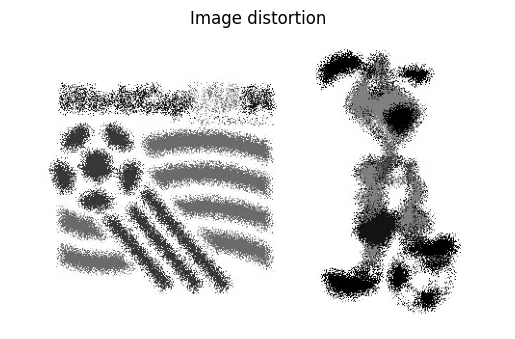

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh và chuyển sang xám nếu là ảnh RGB
data = iio.imread('world_cup.jpg')
if data.ndim == 3:
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])  # ảnh xám

print(data.shape)

V, H = data.shape
M = np.indices((V, H))

d = 5
q = 2 * d * np.random.rand(*M.shape) - d
mp = (M + q).astype(int)

# Đảm bảo không truy cập vượt chỉ số
mp[0] = np.clip(mp[0], 0, V - 1)
mp[1] = np.clip(mp[1], 0, H - 1)

d1 = nd.map_coordinates(data, mp)
plt.imshow(d1, cmap='gray')
plt.title("Image distortion")
plt.axis('off')
plt.show()


1.7 Biến đổi chung (Generic Transformation)

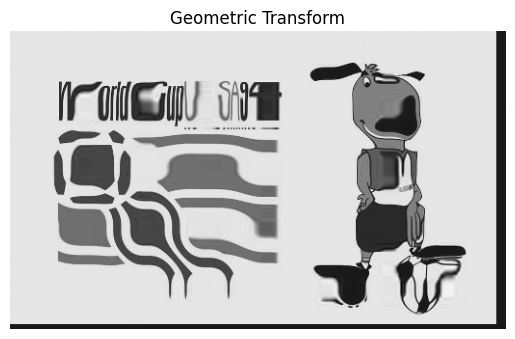

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

# Đọc ảnh và chuyển sang ảnh xám nếu cần
data = iio.imread('world_cup.jpg')
if data.ndim == 3:
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])

# Biến đổi hình học
d1 = nd.geometric_transform(data, GeoFun)

plt.imshow(d1, cmap='gray')
plt.title("Geometric Transform")
plt.axis('off')
plt.show()


2. Bài tập


1.Tịnh tiến quả kiwi sang phải 30 pixels


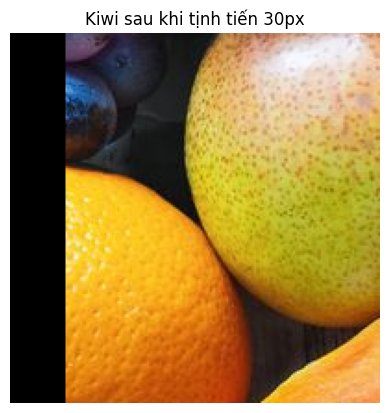

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc ảnh
img = iio.imread('colorful-ripe-tropical-fruits.jpg')  # sửa đường dẫn nếu cần

# Cắt vùng chứa quả kiwi (tọa độ giả định — bạn có thể điều chỉnh)
kiwi = img[300:500, 100:300]

# Tịnh tiến quả kiwi sang phải 30 pixel
translated = nd.shift(kiwi, shift=(0, 30, 0))  # shift theo chiều (y, x, channels)

# Hiển thị ảnh sau khi tịnh tiến
plt.imshow(translated)
plt.axis('off')
plt.title('Kiwi sau khi tịnh tiến 30px')
plt.show()

# Lưu ảnh kết quả
iio.imwrite('/content/kiwi_translated.jpg', translated)


2.Đổi màu hai đối tượng

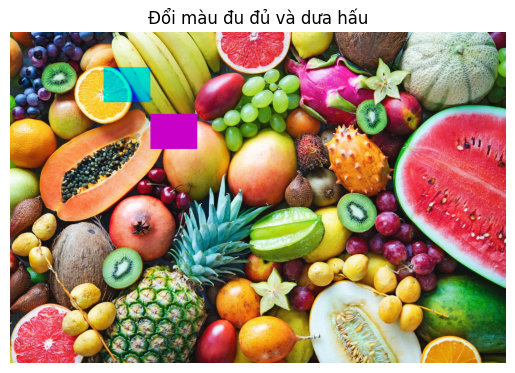

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = iio.imread('colorful-ripe-tropical-fruits.jpg')
output = img.copy()

# Chọn vùng quả đu đủ (toạ độ mẫu, bạn điều chỉnh nếu cần)
papaya = output[150:300, 400:600]
# Đổi màu đu đủ thành màu xanh (giảm đỏ, tăng xanh)
papaya[:, :, 0] = 0           # Kênh đỏ
papaya[:, :, 1] = papaya[:, :, 1]  # Kênh xanh giữ nguyên
papaya[:, :, 2] = 200         # Kênh xanh dương tăng

# Gán lại vào ảnh gốc
output[150:300, 400:600] = papaya

# Chọn vùng quả dưa hấu (toạ độ mẫu, bạn điều chỉnh nếu cần)
watermelon = output[350:500, 600:800]
# Đổi màu dưa hấu thành màu tím (tăng đỏ và xanh dương)
watermelon[:, :, 0] = 200  # đỏ
watermelon[:, :, 1] = 0    # xanh lá giảm
watermelon[:, :, 2] = 200  # xanh dương

# Gán lại vào ảnh gốc
output[350:500, 600:800] = watermelon

# Hiển thị kết quả
plt.imshow(output)
plt.axis('off')
plt.title("Đổi màu đu đủ và dưa hấu")
plt.show()

# Lưu ảnh kết quả
iio.imwrite('/content/fruit_recolored.jpg', output)


3. Xoay 2 đối tượng này 1 góc 45 độ và lưu vào máy


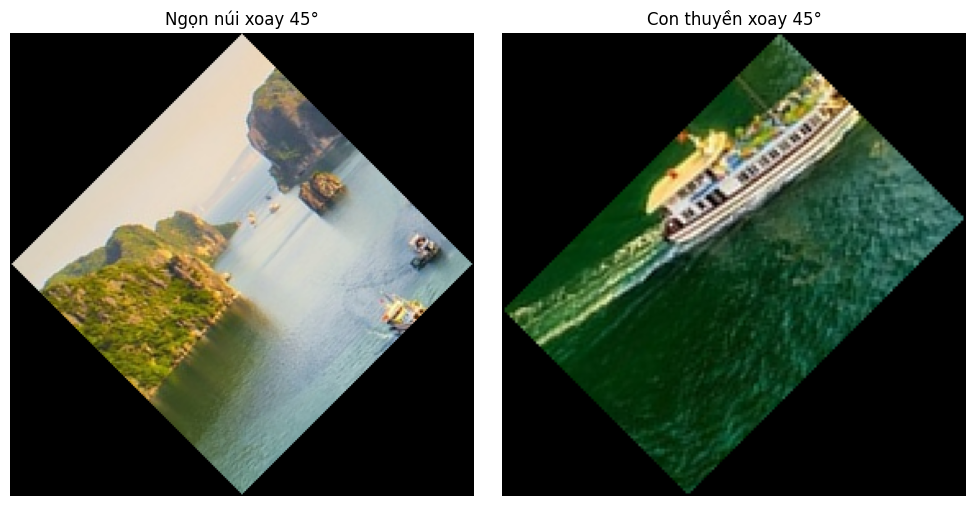

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc ảnh
img = iio.imread('quang_ninh.jpg')  # chỉnh đường dẫn nếu cần

# --- 1. Chọn vùng ngọn núi (tọa độ ví dụ)
mountain = img[100:300, 100:300]
mountain_rotated = nd.rotate(mountain, 45, reshape=True)

# --- 2. Chọn vùng con thuyền (tọa độ ví dụ)
boat = img[350:450, 500:650]
boat_rotated = nd.rotate(boat, 45, reshape=True)

# Hiển thị kết quả
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(mountain_rotated)
axs[0].set_title("Ngọn núi xoay 45°")
axs[0].axis('off')

axs[1].imshow(boat_rotated)
axs[1].set_title("Con thuyền xoay 45°")
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Lưu kết quả
iio.imwrite('/content/mountain_rotated.jpg', mountain_rotated)
iio.imwrite('/content/boat_rotated.jpg', boat_rotated)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving quang_ninh.jpg to quang_ninh.jpg


4. Tăng kích thước ngôi chùa lên 5 lần và lưu vào máy

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving pagoda.jpg to pagoda.jpg


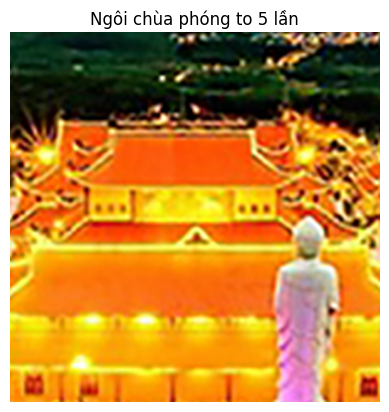

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc ảnh gốc
img = iio.imread('pagoda.jpg')

# --- Cắt vùng ngôi chùa (tọa độ ví dụ, điều chỉnh nếu cần)
pagoda = img[100:250, 200:350]

# --- Phóng to 5 lần (dùng zoom)
zoomed_pagoda = nd.zoom(pagoda, (5, 5, 1))  # (scale_y, scale_x, channels)

# Hiển thị
plt.imshow(zoomed_pagoda)
plt.title("Ngôi chùa phóng to 5 lần")
plt.axis('off')
plt.show()

# Lưu ảnh kết quả
iio.imwrite('/content/pagoda_zoomed.jpg', zoomed_pagoda)


5. Người dùng chọn hình nào thì thực hiện phép biến đổi trên hình đó


Chọn phép biến đổi:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map
Nhập lựa chọn (T/X/P/H/C): T

Chọn ảnh:
1 - colorful-ripe-tropical-fruits.jpg
2 - quang_ninh.jpg
3 - pagoda.jpg
Nhập số ảnh (1/2/3): 1
▶ Tịnh tiến ảnh 50px sang phải


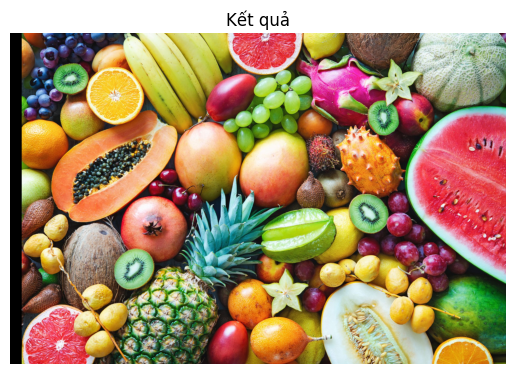

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Hàm hiển thị ảnh
def show_image(img, title='Kết quả'):
    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')
    plt.title(title)
    plt.show()

# --- Menu người dùng chọn ---
print("Chọn phép biến đổi:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map")

choice = input("Nhập lựa chọn (T/X/P/H/C): ").strip().upper()

print("\nChọn ảnh:")
print("1 - colorful-ripe-tropical-fruits.jpg")
print("2 - quang_ninh.jpg")
print("3 - pagoda.jpg")

img_choice = input("Nhập số ảnh (1/2/3): ").strip()

# Lấy đường dẫn ảnh
img_map = {
    "1": "colorful-ripe-tropical-fruits.jpg",
    "2": "quang_ninh.jpg",
    "3": "pagoda.jpg"
}
path = img_map.get(img_choice)

if not path:
    print("❌ Ảnh không hợp lệ.")
else:
    img = iio.imread(path)

    if choice == "T":
        print("▶ Tịnh tiến ảnh 50px sang phải")
        result = nd.shift(img, shift=(0, 50, 0))  # dịch phải
        show_image(result)

    elif choice == "X":
        print("▶ Xoay ảnh 45 độ")
        result = nd.rotate(img, angle=45, reshape=True)
        show_image(result)

    elif choice == "P":
        print("▶ Phóng to ảnh gấp 2 lần")
        result = nd.zoom(img, (2, 2, 1))  # zoom 2x
        show_image(result)

    elif choice == "H":
        print("▶ Thu nhỏ ảnh 0.5 lần")
        result = nd.zoom(img, (0.5, 0.5, 1))  # zoom 0.5x
        show_image(result)

    elif choice == "C":
        print("▶ Biến dạng ảnh bằng coordinate map")
        def distort(coords):
            a = coords[0] + 10 * np.sin(coords[1] / 20.0)
            b = coords[1] + 10 * np.sin(coords[0] / 20.0)
            return a, b

        if img.ndim == 3:
            # Áp dụng riêng từng kênh
            result = np.stack([
                nd.geometric_transform(img[:, :, i], distort)
                for i in range(3)
            ], axis=2)
        else:
            result = nd.geometric_transform(img, distort)

        show_image(result)

    else:
        print("❌ Lựa chọn không hợp lệ.")


Bài 1:
Chọn ảnh quả kiwi bất kì .

In [5]:
from google.colab import files
uploaded = files.upload()


Saving images.jfif to images.jfif


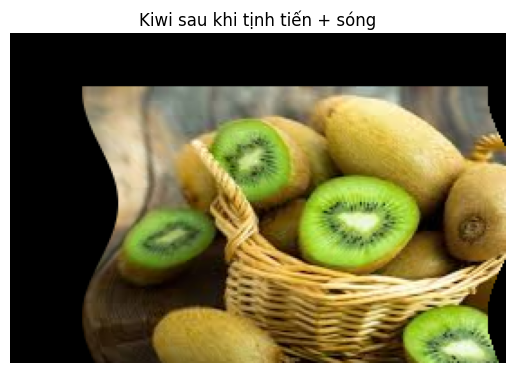

In [6]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc ảnh kiwi
img = iio.imread('images.jfif')  # ← đúng tên file bạn vừa upload

# Bước 1: Cắt vùng kiwi nếu cần (hoặc dùng nguyên ảnh nếu đã crop)
kiwi = img  # hoặc kiwi = img[y1:y2, x1:x2]

# Bước 2: Tịnh tiến kiwi
translated = nd.shift(kiwi, shift=(30, 50, 0))

# Bước 3: Áp dụng hiệu ứng sóng với sin
H, W = translated.shape[:2]
Y, X = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')

# Tạo biến dạng tọa độ
amplitude = 10
frequency = 20
X_warped = X + amplitude * np.sin(Y / frequency)
Y_warped = Y

# Biến đổi bằng map_coordinates từng kênh
wave_img = np.zeros_like(translated)
for c in range(3):
    wave_img[..., c] = nd.map_coordinates(translated[..., c], [Y_warped, X_warped], order=1)

# Hiển thị kết quả
plt.imshow(wave_img)
plt.title('Kiwi sau khi tịnh tiến + sóng')
plt.axis('off')
plt.show()

# Bước 4: Lưu ảnh kết quả
iio.imwrite('/content/images.jfif', wave_img)


Bài 2:
Chọn quả đu đủ và dưa hấu từ google.

In [8]:
from google.colab import files
uploaded = files.upload()


Saving images (1).jfif to images (1).jfif
Saving download.jfif to download.jfif


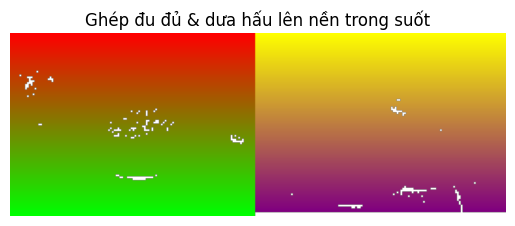

In [9]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt

# ---- 1. Đọc ảnh đu đủ và dưa hấu (đã tách nền hoặc nền trắng)
papaya = iio.imread('/content/download.jfif')   # hoặc .jpg nếu không có alpha
watermelon = iio.imread('/content/images (1).jfif')

# ---- 2. Resize cho đồng bộ
from scipy.ndimage import zoom
def resize_img(img, scale):
    return zoom(img, (scale, scale, 1), order=1)

papaya = resize_img(papaya, 0.5)
watermelon = resize_img(watermelon, 0.5)

# ---- 3. Tạo gradient màu mới

def apply_gradient(img, color_start, color_end):
    h, w, _ = img.shape
    gradient = np.linspace(color_start, color_end, h).astype(np.uint8)
    gradient = np.repeat(gradient[:, np.newaxis, :], w, axis=1)

    mask = (img[..., :3].mean(axis=2) > 30).astype(np.uint8)  # simple mask (nền trắng)
    new_img = np.where(mask[..., None], gradient, 0)

    # Thêm alpha
    alpha = (mask * 255).astype(np.uint8)
    rgba = np.dstack((new_img, alpha))
    return rgba

# Đu đủ: đỏ → xanh lá
papaya_new = apply_gradient(papaya, color_start=[255, 0, 0], color_end=[0, 255, 0])

# Dưa hấu: vàng → tím
watermelon_new = apply_gradient(watermelon, color_start=[255, 255, 0], color_end=[128, 0, 128])

# ---- 4. Tạo canvas nền trong suốt
canvas_h = max(papaya_new.shape[0], watermelon_new.shape[0])
canvas_w = papaya_new.shape[1] + watermelon_new.shape[1]
canvas = np.zeros((canvas_h, canvas_w, 4), dtype=np.uint8)

# ---- 5. Ghép ảnh
canvas[:papaya_new.shape[0], :papaya_new.shape[1], :] = papaya_new
canvas[:watermelon_new.shape[0], papaya_new.shape[1]:, :] = watermelon_new

# ---- 6. Hiển thị và lưu
plt.imshow(canvas)
plt.axis('off')
plt.title("Ghép đu đủ & dưa hấu lên nền trong suốt")
plt.show()

iio.imwrite('/content/papaya_watermelon_gradient.png', canvas)


 Bài 3: Núi & Thuyền – Xoay + Phản chiếu dọc + Ghép ảnh

In [10]:
from google.colab import files
uploaded = files.upload()


Saving mountain.jpg to mountain.jpg
Saving boat.jpg to boat.jpg


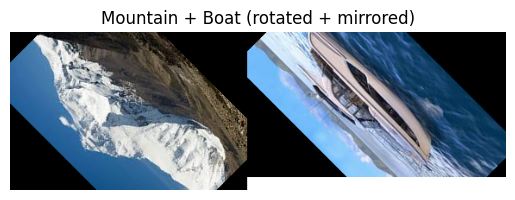

In [11]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Bước 1: Đọc ảnh núi và thuyền
mountain = iio.imread('/content/mountain.jpg')
boat = iio.imread('/content/boat.jpg')

# Bước 2: Xoay ảnh 45 độ, không thay đổi kích thước
mountain_rot = nd.rotate(mountain, 45, reshape=False)
boat_rot = nd.rotate(boat, 45, reshape=False)

# Bước 3: Phản chiếu dọc (lật ảnh theo chiều dọc)
mountain_mirror = np.flipud(mountain_rot)
boat_mirror = np.flipud(boat_rot)

# Bước 4: Tạo canvas trắng và ghép ảnh
h = max(mountain_mirror.shape[0], boat_mirror.shape[0])
w = mountain_mirror.shape[1] + boat_mirror.shape[1]

canvas = np.ones((h, w, 3), dtype=np.uint8) * 255  # nền trắng

# Gán ảnh núi bên trái
canvas[:mountain_mirror.shape[0], :mountain_mirror.shape[1], :] = mountain_mirror

# Gán ảnh thuyền bên phải
canvas[:boat_mirror.shape[0], mountain_mirror.shape[1]:, :] = boat_mirror

# Bước 5: Hiển thị và lưu
plt.imshow(canvas)
plt.axis('off')
plt.title('Mountain + Boat (rotated + mirrored)')
plt.show()

iio.imwrite('/content/mountain_boat_mirror.jpg', canvas)


Bài 4: Phóng to + Uốn cong ngôi chùa

In [12]:
from google.colab import files
uploaded = files.upload()


Saving pagoda.jpg to pagoda.jpg


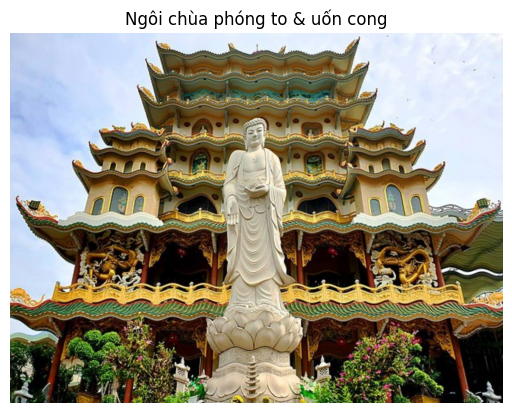

In [14]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Bước 1: Đọc ảnh ngôi chùa
img = iio.imread('/content/pagoda.jpg')

# Bước 2: Phóng to 5 lần
zoomed = nd.zoom(img, (5, 5, 1), order=1)

# Bước 3: Hàm uốn cong (chỉ dùng cho ảnh 2D → nên áp dụng từng kênh)
def warp_fun(output_coords):
    y, x = output_coords
    offset = 20 * np.sin(x / 50.0)  # uốn cong theo trục x
    return y + offset, x

# Bước 4: Áp dụng với từng kênh màu
warped_channels = [
    nd.geometric_transform(zoomed[:, :, i], warp_fun, order=1, mode='reflect')
    for i in range(zoomed.shape[2])
]

# Bước 5: Ghép lại thành ảnh màu
warped = np.stack(warped_channels, axis=2)

# Bước 6: Hiển thị và lưu
plt.imshow(warped)
plt.axis('off')
plt.title("Ngôi chùa phóng to & uốn cong")
plt.show()

iio.imwrite('/content/pagoda_warped.jpg', warped)


Bài 5: Tạo menu tương tác

Saving mountain.jpg to mountain (2).jpg
Saving boat.jpg to boat (2).jpg
Saving pagoda.jpg to pagoda (2).jpg
=== MENU BIẾN ĐỔI ẢNH ===
T - Tịnh tiến
X - Xoay
P - Phóng to / Thu nhỏ
H - Làm mờ Gaussian
C - Biến đổi sóng (sin)
Nhập lựa chọn (T/X/P/H/C): X
Nhập góc xoay (độ): 90
Giữ kích thước ban đầu? (y/n): y


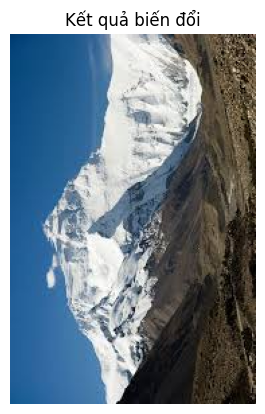

In [16]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from google.colab import files

# B1: Upload ảnh (chọn 1 trong 3 ảnh bất kỳ)
uploaded = files.upload()

# B2: Đọc ảnh
img_name = list(uploaded.keys())[0]
img = iio.imread(img_name)

# B3: Hiển thị lựa chọn menu
print("=== MENU BIẾN ĐỔI ẢNH ===")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to / Thu nhỏ")
print("H - Làm mờ Gaussian")
print("C - Biến đổi sóng (sin)")
option = input("Nhập lựa chọn (T/X/P/H/C): ").upper()

# B4: Xử lý từng lựa chọn
result = img.copy()

if option == 'T':
    dx = int(input("Nhập số pixel tịnh tiến theo X: "))
    dy = int(input("Nhập số pixel tịnh tiến theo Y: "))
    result = nd.shift(img, shift=(dy, dx, 0))

elif option == 'X':
    angle = float(input("Nhập góc xoay (độ): "))
    reshape = input("Giữ kích thước ban đầu? (y/n): ").lower() != 'n'
    result = nd.rotate(img, angle, reshape=reshape)

elif option == 'P':
    scale = float(input("Nhập hệ số phóng to / thu nhỏ (ví dụ: 1.5 hoặc 0.5): "))
    result = nd.zoom(img, (scale, scale, 1))

elif option == 'H':
    sigma = float(input("Nhập giá trị sigma (mức làm mờ): "))
    result = nd.gaussian_filter(img, sigma=(sigma, sigma, 0))

elif option == 'C':
    # Biến đổi sóng cho ảnh màu
    def wave_fun(coords):
        y, x = coords
        offset = 20 * np.sin(x / 50.0)
        return y + offset, x

    channels = [
        nd.geometric_transform(img[:, :, i], wave_fun, order=1, mode='reflect')
        for i in range(img.shape[2])
    ]
    result = np.stack(channels, axis=2)

else:
    print("Lựa chọn không hợp lệ!")

# B5: Hiển thị kết quả
plt.imshow(result)
plt.axis('off')
plt.title("Kết quả biến đổi")
plt.show()
